<a href="https://colab.research.google.com/github/WelfLowe/Public-ML-Notebooks/blob/master/Pearson_as_online_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

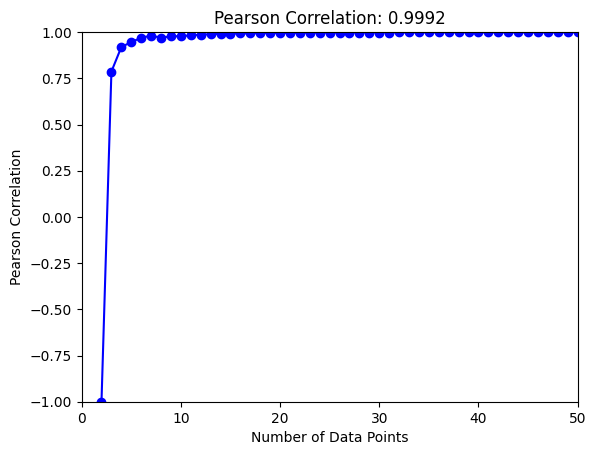

In [1]:
import math
import random
import matplotlib.pyplot as plt

class OnlinePearson:
    def __init__(self):
        self.n = 0
        self.S_x = self.S_y = 0
        self.S_xx = self.S_yy = self.S_xy = 0

    def update(self, x, y):
        self.n += 1
        self.S_x += x
        self.S_y += y
        self.S_xx += x * x
        self.S_yy += y * y
        self.S_xy += x * y

    def compute(self):
        if self.n < 2:
            return float('nan')  # Not enough data for correlation

        mean_x = self.S_x / self.n
        mean_y = self.S_y / self.n
        var_x = (self.S_xx / self.n) - mean_x**2
        var_y = (self.S_yy / self.n) - mean_y**2
        cov_xy = (self.S_xy / self.n) - (mean_x * mean_y)

        if var_x == 0 or var_y == 0:
            return float('nan')  # Avoid division by zero

        return cov_xy / math.sqrt(var_x * var_y)

# Initialize Online Pearson correlation tracker
online_corr = OnlinePearson()

# Generate synthetic data
random.seed(42)
data = [(i, 2 * i + random.uniform(-2, 2)) for i in range(1, 51)]  # 50 data points with slight noise

# Store correlation values for plotting
correlations = []
steps = []

# Real-time plotting setup, disabled on notebook
# plt.ion()
fig, ax = plt.subplots()
ax.set_ylim(-1, 1)
ax.set_xlim(0, len(data))
ax.set_xlabel("Number of Data Points")
ax.set_ylabel("Pearson Correlation")
line, = ax.plot([], [], marker="o", linestyle="-", color="b")

# Process data and update plot
for i, (x, y) in enumerate(data, 1):
    online_corr.update(x, y)
    corr = online_corr.compute()
    correlations.append(corr)
    steps.append(i)

    # Update plot
    line.set_xdata(steps)
    line.set_ydata(correlations)
    ax.set_title(f"Pearson Correlation: {corr:.4f}")
    plt.draw()
    #plt.pause(0.1)

# Real-time plotting setup, disabled on notebook
# plt.ioff()
plt.show()
